In [1]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

C:\Program Files\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pickle
f=open("trainX.pickle","rb")
images=pickle.load(f)
f=open("trainY.pickle","rb")
labels = pickle.load(f)

In [89]:
from sklearn import model_selection
img_rows, img_cols=28,28

#the data shuffled and split between train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(images, labels,random_state=13)

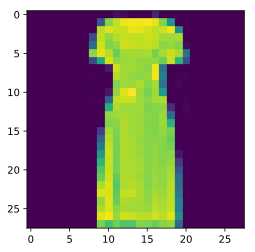

In [84]:
image = X_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

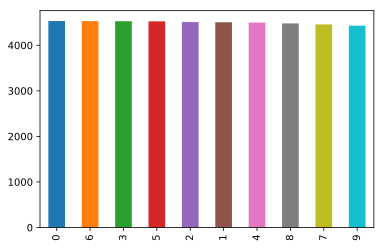

In [90]:
y_train.shape
df = pd.DataFrame(y_train)
df[0].value_counts().plot(kind='bar')
plt.show()

In [93]:
df[0].value_counts()

0    4533
6    4530
3    4529
5    4525
2    4510
1    4505
4    4500
8    4480
7    4458
9    4430
Name: 0, dtype: int64

In [4]:
K.image_data_format()  

'channels_last'

In [17]:
 if K.image_data_format() =='channels_first':
    X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
    X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1 )
    input_shape=(img_rows, img_cols, 1)

In [18]:

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))

x_train shape: (45000, 28, 28, 1)
x_test shape: (15000, 28, 28, 1)


In [19]:
X_train = X_train.astype('float32')
X_test= X_test.astype('float32')
X_train/=255
X_test/=255
print(('X_train_ shape:', X_train.shape))
print((X_train.shape[0], 'train samples'))
print((X_test.shape[0], 'test samples'))

#pixels 0-255 .. so 0-1 p normalize    therfore /255
y_train  = keras.utils.to_categorical(y_train,10)
y_test= keras.utils.to_categorical(y_test,10)

('X_train_ shape:', (45000, 28, 28, 1))
(45000, 'train samples')
(15000, 'test samples')


In [14]:
X_train.shape

(45000, 784)

In [20]:

batch_size = 256 #used 128
n_classes = 10  # the label value ranges from 0-9 
epochs = 20

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [12]:
import tensorflow as tf
tf.reset_default_graph()
tbcallback = keras.callbacks.TensorBoard(log_dir="./Graph", histogram_freq=0, write_graph=True, write_images=True)

In [21]:
#Evaluation of our model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test), callbacks=[tbcallback])

W0623 20:43:37.562728 22732 deprecation.py:323] From C:\Users\Meenakshi Sharma\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 15000 samples


W0623 20:43:38.880257 22732 deprecation_wrapper.py:119] From C:\Program Files\anaconda\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0623 20:43:38.882507 22732 deprecation_wrapper.py:119] From C:\Program Files\anaconda\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/20
45000/45000 [==============================] - 57s 1ms/step - loss: 0.8293 - acc: 0.6908 - val_loss: 0.5002 - val_acc: 0.8218
Epoch 2/20
45000/45000 [==============================] - 59s 1ms/step - loss: 0.5084 - acc: 0.8132 - val_loss: 0.3929 - val_acc: 0.8587
Epoch 3/20
45000/45000 [==============================] - 58s 1ms/step - loss: 0.4288 - acc: 0.8435 - val_loss: 0.3500 - val_acc: 0.8707
Epoch 4/20
45000/45000 [==============================] - 56s 1ms/step - loss: 0.3831 - acc: 0.8599 - val_loss: 0.3171 - val_acc: 0.8843
Epoch 5/20
45000/45000 [==============================] - 56s 1ms/step - loss: 0.3583 - acc: 0.8682 - val_loss: 0.2990 - val_acc: 0.8902
Epoch 6/20
45000/45000 [==============================] - 56s 1ms/step - loss: 0.3398 - acc: 0.8750 - val_loss: 0.2821 - val_acc: 0.8951
Epoch 7/20
45000/45000 [==============================] - 59s 1ms/step - loss: 0.3230 - acc: 0.8811 - val_loss: 0.2801 - val_acc: 0.8936
Epoch 8/20
45000/45000 [=================

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)

In [23]:
#Print testing data loss and accuracy of our model
print('Loss:',score[0])
print('Accuracy:',score[1])

Loss: 0.22741120838920276
Accuracy: 0.9178666666348775


# Visualization of Output

In [60]:
history.params

{'batch_size': 256,
 'epochs': 20,
 'steps': None,
 'samples': 45000,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [62]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

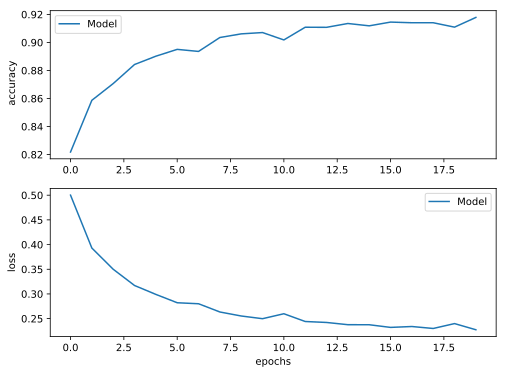

In [67]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
ax1.plot(val_acc, label='Model')
ax2.plot(val_loss, label='Model')
    
ax1.set_ylabel(' accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

## CHECKING THE REAL VALUES

In [24]:
predicted_classes = model.predict_classes(X_test)
#get the indices to be plotted


In [31]:
dataset=pd.DataFrame(predicted_classes)


In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(images, labels,random_state=13)

In [41]:
y_true = y_test

# classification_report

In [82]:
from sklearn.metrics import classification_report
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

               precision    recall  f1-score   support

Class 0 (9) :       0.85      0.87      0.86      1467
Class 1 (0) :       0.99      0.99      0.99      1495
Class 2 (0) :       0.90      0.86      0.88      1490
Class 3 (3) :       0.90      0.94      0.92      1471
Class 4 (0) :       0.86      0.89      0.87      1500
Class 5 (2) :       0.98      0.98      0.98      1475
Class 6 (7) :       0.77      0.74      0.76      1470
Class 7 (2) :       0.94      0.98      0.96      1542
Class 8 (5) :       0.99      0.98      0.98      1520
Class 9 (5) :       0.99      0.95      0.97      1570

    micro avg       0.92      0.92      0.92     15000
    macro avg       0.92      0.92      0.92     15000
 weighted avg       0.92      0.92      0.92     15000



The best accuracy is obtained for Class 1, Class 5, Class 8, Class 9 and Class 2. Worst accuracy is for Class 6.

The recall is highest for Class 1, Class 7,8 and smallest for Class 6 and Class 4.

f1-score is highest for Class 1, Class 5 and Class 8 and smallest for Class 6 followed by Class 4 and Class 0.

In [42]:
dataset['true_data']=y_true.tolist()

In [83]:
dataset.head()

0  true_data
0  2          2
1  7          7
2  5          5
3  6          6
4  0          0

In [45]:
dataset[dataset[0]==dataset['true_data']].count()

0            13768
true_data    13768
dtype: int64

## Model predicted 13768 data right
#1232 wrong predicted

## Data wrongly predicted 

In [49]:
dataset[dataset[0]!=dataset['true_data']].groupby(0).count()

true_data
0           
0        218
1         12
2        140
3        156
4        217
5         30
6        318
7        101
8         22
9         18

In [ ]:
dataset[dataset[0]!=dataset['true_data']]

# Count of different labels

### Label Count predicted my model 

In [53]:
dataset.groupby(0).count()

true_data
0           
0       1494
1       1490
2       1418
3       1535
4       1547
5       1471
6       1410
7       1618
8       1514
9       1503

### Actual Label Count 

In [54]:
dataset.groupby('true_data').count()

0
true_data      
0          1467
1          1495
2          1490
3          1471
4          1500
5          1475
6          1470
7          1542
8          1520
9          1570

## Training of whole Data and Testing given file

In [55]:
f=open("testX.pickle","rb")
test_X = pickle.load(f)

In [56]:
X_train=images
y_train=labels

In [57]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols,1 )
input_shape=(img_rows, img_cols, 1)

In [58]:
X_train = X_train.astype('float32')
test_X= test_X.astype('float32')
X_train/=255
test_X/=255
print(('X_train_ shape:', X_train.shape))
print((X_train.shape[0], 'train samples'))
print((X_test.shape[0], 'test samples'))

#pixels 0-255 .. so 0-1 p normalize    therfore /255
y_train  = keras.utils.to_categorical(y_train,10)
#y_test= keras.utils.to_categorical(y_test,10)

('X_train_ shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(15000, 'test samples')


In [68]:
#Evaluation of our model
history_final = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[tbcallback])

Epoch 1/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2503 - acc: 0.9072
Epoch 2/20
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2438 - acc: 0.9098
Epoch 3/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2397 - acc: 0.9112
Epoch 4/20
60000/60000 [==============================] - 74s 1ms/step - loss: 0.2355 - acc: 0.9131
Epoch 5/20
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2330 - acc: 0.9147
Epoch 6/20
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2294 - acc: 0.9149
Epoch 7/20
60000/60000 [==============================] - 52s 862us/step - loss: 0.2249 - acc: 0.9170
Epoch 8/20
60000/60000 [==============================] - 53s 877us/step - loss: 0.2253 - acc: 0.9154
Epoch 9/20
60000/60000 [==============================] - 51s 854us/step - loss: 0.2200 - acc: 0.9179
Epoch 10/20
60000/60000 [==============================] - 52s 865us/step - loss: 0.2162 - acc

## Predicting on Test_X given

In [71]:
predicted_labels = model.predict_classes(test_X)

In [72]:
Result=pd.DataFrame(predicted_labels) 

In [77]:
Result[0].value_counts()

3    1059
7    1036
0    1030
8    1014
2    1013
4     997
5     992
1     985
9     976
6     898
Name: 0, dtype: int64

In [79]:
Result

0
0     9
1     2
2     1
3     1
4     6
5     1
6     4
7     6
8     5
9     7
10    4
11    5
12    7
13    3
14    4
15    1
16    2
17    4
18    8
19    0
20    2
21    5
22    7
23    5
24    1
25    2
26    6
27    0
28    9
29    3
...  ..
9970  2
9971  6
9972  6
9973  9
9974  7
9975  8
9976  5
9977  0
9978  9
9979  6
9980  0
9981  0
9982  8
9983  1
9984  3
9985  2
9986  7
9987  5
9988  8
9989  4
9990  5
9991  6
9992  8
9993  9
9994  1
9995  9
9996  1
9997  8
9998  1
9999  5

[10000 rows x 1 columns]

## Saving the result

In [81]:
Result.to_pickle("./pred_answer.pickle")
#saved in 2 extensions: whichever may work
Result.to_csv("./pred_answer.csv",index = None, header=False)